### 1. Problem Statement

1.1 Introduction

A New Production House by name 'Fantastic Fantasy Films (FFF)' has entered the Hollywood Show Business Market. 
Before venturing into the area of producing movies, a data base of 1000 Movies of different genres is set up for a Data Scientist to analyse the details and provide a platform for the Production House to get a basic understanding on the Movies data. 
The objective of this project is to help this new production house understand the movies industry so they can understand how their investments in the show business should be.

1.2 Data Source & Dataset

In Hollywood, an average of 600 movies are produced/released per year - so 6000 movies were released between 2006 and 2016. 
To understand the trend in the current market scenario, a Data Scientist was approached to provide inputs on a sample of the data.
1.2.1 Thousand movies released between 2006 and 2016 were taken as sample 
1.2.2 The IMDB ratings collected spanned between a low of 1 to a high of 9
1.2.3 The movies collected were from different genres/set of genres

### 2. Data Loading and Description

#### Importing packages                                          

In [44]:
import sys                                                                      # Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import bokeh

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

!pip install pandas_profiling

#### Importing the Dataset

In [45]:
movies1000=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movies1000

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


## 3. Data Profiling

In this section, the following is done

1. Understand the Data & Dataset by using the various Pandas Functions & Functionalities
2. Perform Pandas Profiling (Pre Profiling) to identify those columns in the dataset that need Processing
3. In Processing, deal with the missing data, erroneous data and apply suitable transformations/fixes
4. Perform Pandas Profiling again (Post Profiling) to see how the Processing has transformed the missing/erroneous data

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [46]:
movies1000.shape                                 # This will print the number of rows and comlumns of the Data Set

(1000, 12)

movies1000 dataset has 1000 Rows and 12 Columns

In [47]:
movies1000.dtypes                                                   # Display the data type for each variable

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [48]:
movies1000.columns                                            # This will print the names of all columns.

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

The Runtime (Minutes) & Revenue (Millions) as columns names can create a bit of complexity with a space in between as compared to other columns. So these can be renamed to Runtime_Min & Revenue_Millions  respectively

In [49]:
movies1000 =  movies1000.rename(columns = {'Revenue (Millions)':'Revenue_Millions', 'Runtime (Minutes)':'Runtime_Minutes'})
movies1000.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

In [50]:
movies1000.head()                                                           # Display the first five rows of the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section301></a>

As you can see the Genres of the movies are clubbed together so it is a good idea to split the genres up per movie during the pre-processing

In [51]:
movies1000.tail()                                                   # This will print the last five rows of the Data Set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [52]:
movies1000.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                1000 non-null int64
Title               1000 non-null object
Genre               1000 non-null object
Description         1000 non-null object
Director            1000 non-null object
Actors              1000 non-null object
Year                1000 non-null int64
Runtime_Minutes     1000 non-null int64
Rating              1000 non-null float64
Votes               1000 non-null int64
Revenue_Millions    872 non-null float64
Metascore           936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [53]:
movies1000.describe(include = 'all')           #This is to describe categorical data .. frequency is what is important as it provides the mode

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","After an experimental bio-weapon is released, ...",Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [54]:
movies1000.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime_Minutes       0
Rating                0
Votes                 0
Revenue_Millions    128
Metascore            64
dtype: int64

As you can see from the above, the Revenue  & Metascore are both having Null Values and we will deal with them as a part of Pre-Profiling.

Movies Released per Year

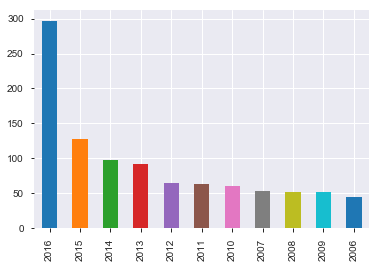

In [55]:
#Univariate Plotting
#Plot the Bar Chart for the number of movies released per year
def create():
    movies1000['Year'].value_counts().plot.bar()
    return None
create()

As we can see the majority of the movies were released in the year 2016

Ratings of Movies 

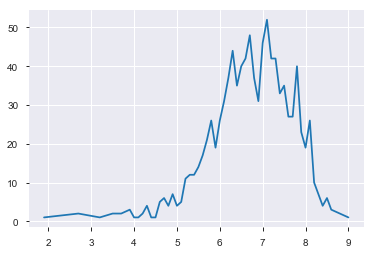

In [58]:
#This plot shows how to use a line chart for Rating
movies1000['Rating'].value_counts().sort_index().plot.line()

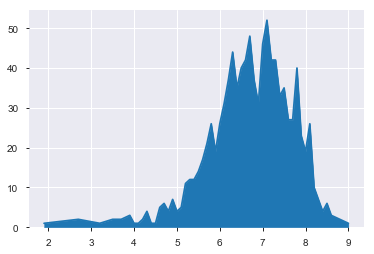

In [59]:
#This plot shows how to use a Area chart for Ratings - This is a line chart but bottom shaded
movies1000['Rating'].value_counts().sort_index().plot.area()

As we can see most of the movie ratings, fall around the rating of 7. So these can typically can be considered as 'Good' Movies.

### 3.2 Pre Profiling

By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
It gives us __visual interpretation__ of each column in the data.
Spread of the data_ can be better understood by the distribution plot. 
Grannular level_ analysis of each column.

In [28]:
import pandas_profiling  # Get a quick overview for all the variables using pandas_profiling                                         
!pip install pandas_profiling
profile = pandas_profiling.ProfileReport(movies1000)
profile.to_file(outputfile="movies1000_before_preprocessing_raghavendra_ashok.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as movies100_before_preprocessing.html. Take a look at the file and see what useful insight you can develop from it. 
Now we will process our data to better understand it.

### 3.3 Preprocessing

There are no columns that needs Dropping as there are no missing entries
There are no columns that needs Dropping as there are no columns with null values
There are no columns that need replacing 0 values as there are no columns with zero values

Statements of Understanding on the Definitions of the Data Columns

As per definition of Rank column (w.r.t IMDB), it is an weighted average rating from all the registered users. 
Since this database does not contain the 'cost of production' or 'investment' or 'budget', there is no way to find out the profit of each of the movies and so the genres. 
Revenue does not indicate the profit so a high revenue movie does not indicate that a movie is successful and was profitable. 
In fact, the highest revenue movies could have an higher 'cost of production' than its revenue leading it to be a disaster
In other words, the lowest revenue movies could have an lower 'cost of production' than its revenue leading it to a box office success.
So when analysing the above needs to be kept in mind and the details are derived based on these things

Replacing missing values of Revenue_Millions with Mean value
Replacing missing values of Metascore with the median value

In [29]:
mean_revenue = movies1000.Revenue_Millions.mean()
median_metascore = movies1000.Metascore.median()
print(mean_revenue)
print(median_metascore)
movies1000.Revenue_Millions.fillna(mean_revenue, inplace = True)
movies1000.Metascore.fillna(median_metascore, inplace=True)

82.95637614678897
59.5


We need to Split up the Genres into separate rows so the unique Genre visualizations can be obtained

In [30]:
#Split Up the Genres into separate rows
movies_new = (movies1000.set_index(['Rank', 'Title', 'Description', 'Director', 'Actors', 'Year', 'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore']).stack().str.split(',', expand=True).stack().unstack(-2).reset_index(-1, drop=True).reset_index())
movies_new

,Rank,Title,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Action
1,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Adventure
2,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Sci-Fi
3,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Adventure
4,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Mystery
5,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Sci-Fi
6,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,Horror
7,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,Thriller
8,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,Animation
9,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,Comedy


## 3.4 Post Pandas Profiling

In [31]:
import pandas_profiling  # Get a quick overview for all the variables using pandas_profiling                                         
!pip install pandas_profiling
profile = pandas_profiling.ProfileReport(movies_new)
profile.to_file(outputfile="movies1000_after_preprocessing_raghavendra_ashok.html")

Post Profiling, by comparing the new data profile generated two clear observations can be made - 
there are no missing values with Revenues_Millions & Metascore
We have also split up the Genres into multiple rows
With this new data, we can now go ahead to start understanding the relationships.

### 4. Questions

### 4.1 What are the Genres that are released the most with good ratings? 

For easier analysis, let us create Bins for Ratings and Revenue_Millions

In [35]:
for i in range(10,0,-1):
        movies_new.loc[ movies_new['Rating'] <= i*1, 'Rating_bin'] = i
print(movies_new[['Rating' , 'Rating_bin']].head(10))
for i in range(10,0,-1):
        movies_new.loc[ movies_new['Revenue_Millions'] <= i*100, 'Revenue_Millions_bin'] = i
print(movies_new[['Revenue_Millions' , 'Revenue_Millions_bin']].head(50))

   Rating  Rating_bin
0     8.1         9.0
1     8.1         9.0
2     8.1         9.0
3     7.0         7.0
4     7.0         7.0
5     7.0         7.0
6     7.3         8.0
7     7.3         8.0
8     7.2         8.0
9     7.2         8.0
    Revenue_Millions  Revenue_Millions_bin
0         333.130000                   4.0
1         333.130000                   4.0
2         333.130000                   4.0
3         126.460000                   2.0
4         126.460000                   2.0
5         126.460000                   2.0
6         138.120000                   2.0
7         138.120000                   2.0
8         270.320000                   3.0
9         270.320000                   3.0
10        270.320000                   3.0
11        325.020000                   4.0
12        325.020000                   4.0
13        325.020000                   4.0
14         45.130000                   1.0
15         45.130000                   1.0
16         45.130000       

As per our initial analysis,most of the movie ratings fall between the range of 6.5 to 8. 
So typically any movie can be considered as 'Good' Movies if the rating is > 6.5
Let us find out the Genre which have the highest movies releases

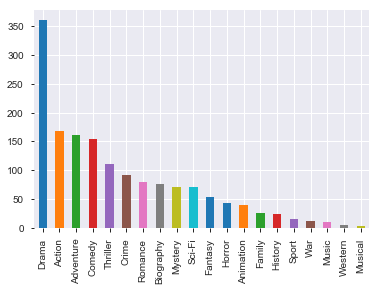

In [71]:
movies_new_rating_high = movies_new[movies_new['Rating'] > 6.5]
#Univariate Plotting
#Plot the Bar Chart for the number of movies released per Genre
def create():
    movies_new_rating_high['Genre'].value_counts().plot.bar()
    return None
create()

As you can see the movie Genre that is released the most is Drama. Followed by Action, Adventure, Comedy

### 4.2  What is most likely Genre Combination to have good ratings?

From the post-profiling, we can observe that the most number of movies made are in the Sequence of Genres - 
Drama
Action 
Comedy 
Adventure.

Let us first get the list of movies only under these genres together.

In [77]:
movies_new_genre = pd.concat([movies_new[movies_new['Genre']  == 'Drama'], 
                              movies_new[movies_new['Genre']  == 'Action'], 
                              movies_new[movies_new['Genre']  == 'Comedy'], 
                              movies_new[movies_new['Genre']  == 'Adventure']])
movies_new_genre

,Rank,Title,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre,Rating_bin,Revenue_Millions_bin
18,7,La La Land,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.0,Drama,9.0,2.0
25,10,Passengers,A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010000,41.0,Drama,7.0,2.0
31,12,Hidden Figures,The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.270000,74.0,Drama,8.0,2.0
41,15,Colossal,Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.870000,70.0,Drama,7.0,1.0
46,17,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.120000,71.0,Drama,9.0,1.0
51,19,Lion,A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.690000,69.0,Drama,9.0,1.0
52,20,Arrival,When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.500000,81.0,Drama,8.0,2.0
56,21,Gold,"Kenny Wells, a prospector desperate for a luck...",Stephen Gaghan,"Matthew McConaughey, Edgar Ramírez, Bryce Dall...",2016,120,6.7,19053,7.220000,49.0,Drama,7.0,1.0
58,22,Manchester by the Sea,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.700000,96.0,Drama,8.0,1.0
60,23,Hounds of Love,A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,82.956376,72.0,Drama,7.0,1.0


In [78]:
movies_new_genre.groupby(['Genre','Rating_bin'])['Genre'].count()

Genre      Rating_bin
Action     3.0             1
           4.0             2
           5.0             9
           6.0            62
           7.0           134
           8.0            82
           9.0            13
Adventure  3.0             1
           5.0             6
           6.0            49
           7.0           101
           8.0            86
           9.0            16
Comedy     2.0             1
           5.0             9
           6.0            52
           7.0           124
           8.0            82
           9.0            11
Drama      4.0             4
           5.0            11
           6.0            59
           7.0           172
           8.0           223
           9.0            44
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Rating distribution using FacetGrid')

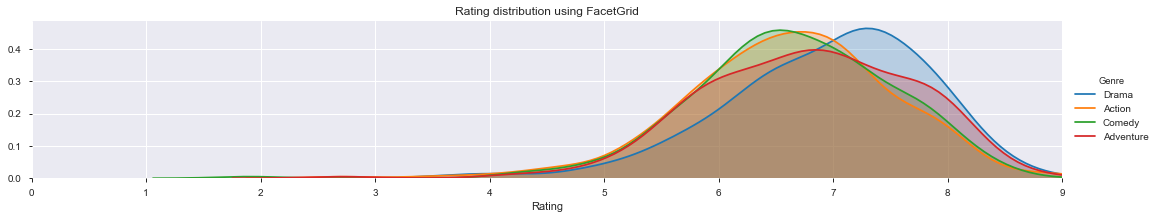

In [79]:
as_fig = sns.FacetGrid(movies_new_genre,hue='Genre',aspect=5)

as_fig.map(sns.kdeplot,'Rating',shade=True)

oldest = movies_new_genre['Rating'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Rating distribution using FacetGrid')

Text(0.5, 1.0, 'Factor plot for the top four different Genres')

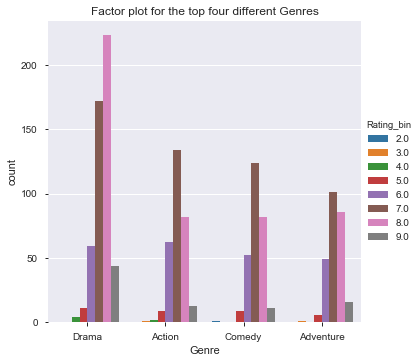

In [81]:
sns.factorplot('Genre', hue='Rating_bin', kind='count', data=movies_new_genre);
plt.title('Factor plot for the top four different Genres')

Out of all top four Genres, a combination of Drama & Adventure is most likely to receive Top Most Ratings

### 4.2 What is the relationship between the top four Genres & Revenue?

Since this database does not contain the 'cost of production' or 'investment' or 'budget', there is no way to find out the profit of each of the movies and so the genres. 
Revenue does not indicate the profit so a high revenue movie does not indicate that a movie is successful and was profitable. 
In fact, the highest revenue movies could have an higher 'cost of production' than its revenue leading it to be a disaster
In other words, the lowest revenue movies could have an lower 'cost of production' than its revenue leading it to a box office success.
So we will limit this analysis to the top 4 Genres only and not extend this to other Genres.

Text(0.5, 1.0, 'Revenue_Millions distribution using FacetGrid')

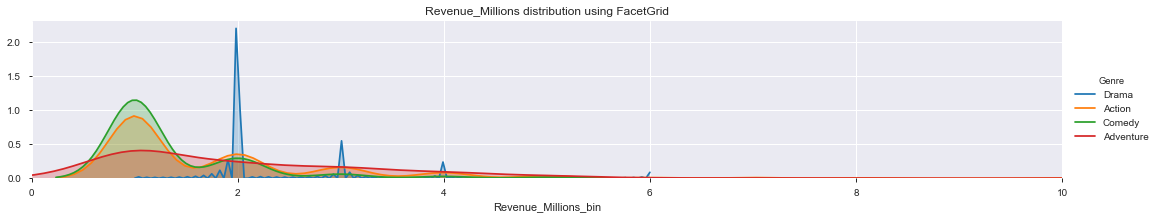

In [83]:
as_fig = sns.FacetGrid(movies_new_genre,hue='Genre',aspect=5)

as_fig.map(sns.kdeplot,'Revenue_Millions_bin',shade=True)

oldest = movies_new_genre['Revenue_Millions_bin'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Revenue_Millions distribution using FacetGrid')

Since it is difficult to understand the revenue of all movies using a FacetGrid, let us try to use the Crosstab & Pie Plot

Text(0.5, 1.0, 'Relation Between Revenue and Top Four Genres')

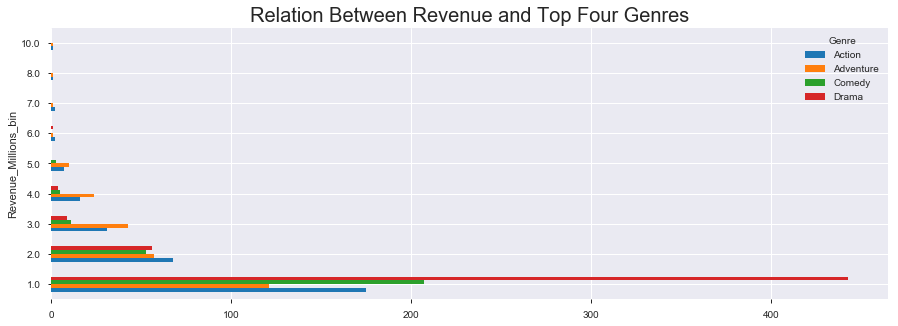

In [84]:
relation = pd.crosstab(movies_new_genre.Revenue_Millions_bin, movies_new_genre.Genre)
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between Revenue and Top Four Genres',size=20)

Text(0.5, 1.0, 'Revenue (Adventure)')

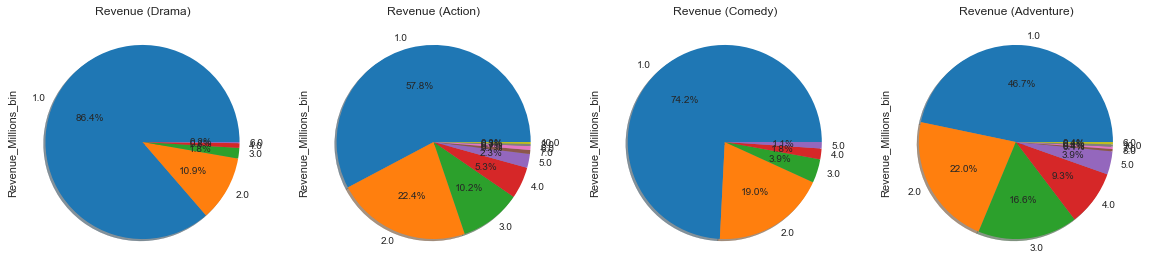

In [85]:
f,ax = plt.subplots(1,4,figsize=(20,7))
movies_new_genre['Revenue_Millions_bin'][movies_new_genre['Genre'] == 'Drama'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
movies_new_genre['Revenue_Millions_bin'][movies_new_genre['Genre'] == 'Action'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
movies_new_genre['Revenue_Millions_bin'][movies_new_genre['Genre'] == 'Comedy'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
movies_new_genre['Revenue_Millions_bin'][movies_new_genre['Genre'] == 'Adventure'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('Revenue (Drama)')
ax[1].set_title('Revenue (Action)')
ax[2].set_title('Revenue (Comedy)')
ax[3].set_title('Revenue (Adventure)')

### 4.3. What is the relationship between top Genres & Metascore ?

Violin Plot to show case the Metascore vs Genre details

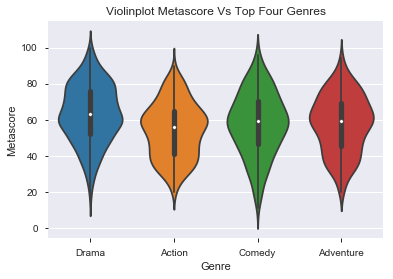

In [86]:
sns.violinplot('Genre','Metascore', kind='point', data = movies_new_genre)
plt.title('Violinplot Metascore Vs Top Four Genres')
plt.show()

### 4.4 What is the relationship between Revenue, Rating & Top 4 Genres?

Using factorplot to see the variation of Metascore Vs Rating Vs Top 4 Genres

Text(0.5, 1.0, 'Factorplot for Top 4 Genres with Rating and Revenue')

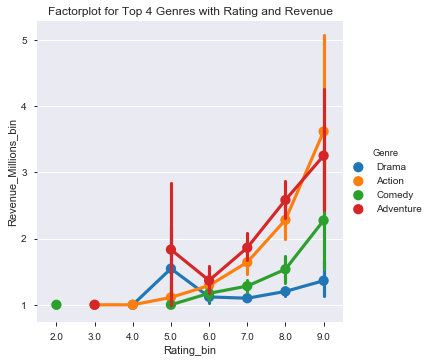

In [87]:
sns.factorplot('Rating_bin','Revenue_Millions_bin', data=movies_new_genre, hue='Genre')
plt.title('Factorplot for Top 4 Genres with Rating and Revenue')

Using Swarm Plot

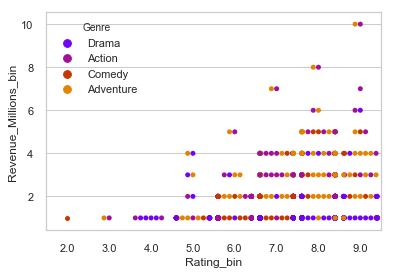

In [88]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="Rating_bin", y="Revenue_Millions_bin", hue="Genre", palette="gnuplot", data=movies_new_genre)

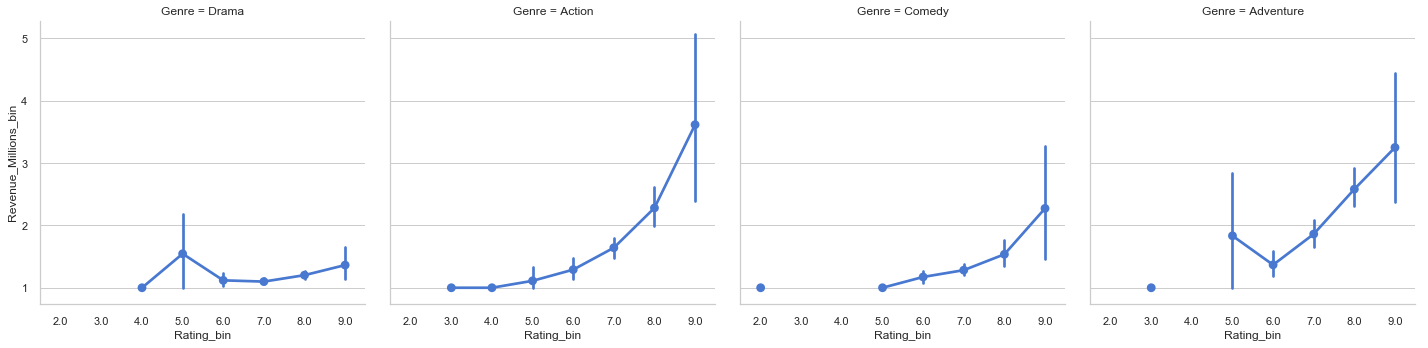

In [89]:
sns.factorplot('Rating_bin','Revenue_Millions_bin', col='Genre' , kind='point', data=movies_new_genre)
plt.show()

### 4.5. Who are the Top Best Directors with Great Ratings (Rating > 8.5) and their Genre Strengths?

In [97]:
movies_new_rating= movies_new[movies_new['Rating']>8.5]
movies_new_rating.groupby(['Genre','Director','Rating_bin'])['Genre'].count()

Genre      Director           Rating_bin
Action     Christopher Nolan  9.0           2
           Nitesh Tiwari      9.0           1
Adventure  Christopher Nolan  9.0           2
Animation  Makoto Shinkai     9.0           1
Biography  Nitesh Tiwari      9.0           1
           Olivier Nakache    9.0           1
Comedy     Olivier Nakache    9.0           1
Crime      Christopher Nolan  9.0           1
Drama      Christopher Nolan  9.0           2
           Makoto Shinkai     9.0           1
           Nitesh Tiwari      9.0           1
           Olivier Nakache    9.0           1
Fantasy    Makoto Shinkai     9.0           1
Sci-Fi     Christopher Nolan  9.0           2
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Relation Between Genre and Director')

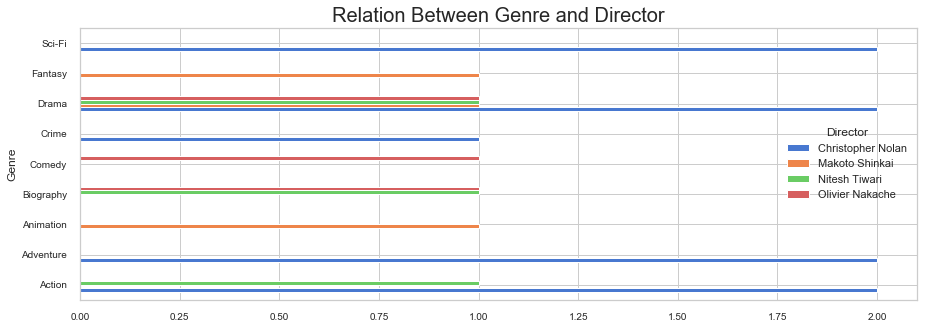

In [98]:
relation = pd.crosstab(movies_new_rating.Genre,movies_new_rating.Director )
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between Genre and Director',size=20)

In [99]:
movies_new_rating['Director'].unique()

array(['Christopher Nolan', 'Makoto Shinkai', 'Nitesh Tiwari',
       'Olivier Nakache'], dtype=object)

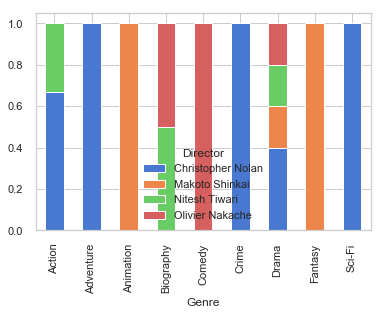

In [100]:
dummy = relation.div(relation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Genre')

The Top Four Directors with movie rating > 8.5 are 
Christopher Nolan
Makoto Shinkai
Nitesh Tiwari
Olivier Nakache

In [103]:
movies_new_rating['Actors'].unique()

array(['Matthew McConaughey, Anne Hathaway, Jessica Chastain, Mackenzie Foy',
       'Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine',
       'Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe',
       'Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Narita, Aoi Yuki',
       'Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,Sanya Malhotra',
       'François Cluzet, Omar Sy, Anne Le Ny, Audrey Fleurot'],
      dtype=object)

### 4.6 Establish coorelation between all the features using heatmap.

Text(0.5, 1.0, 'Correlation between features')

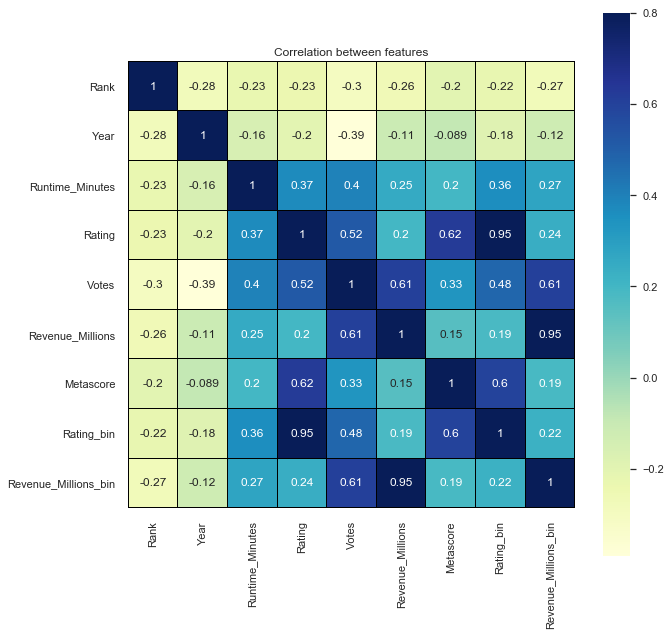

In [104]:
corr = movies_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Ignoring the Bins informaiton, there are No noticeable negative co-relations even though Year and Ratings/Metascore have negative coorelations

## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib to develop better insights about the data.<br/>
- We have also seen how __preprocessing__ helps in dealing with _missing_ values present in the data. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the Genres Vs their relationship with ratings, metascore & Revenue under which most likely the ratings received would be higher
- The most important inference drawn from all this analysis is, we get to know what are the __Genres that are most likely to yield us good Rating, Metascore, Revenue
- This analysis will help us to choose which __machine learning model__ we can apply to predict Genre based Movies with high ratings. 